In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from sklearn.model_selection import train_test_split
from bart_playground import *

In [3]:
from ucimlrepo import fetch_ucirepo
import numpy as np
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
X = X.drop(columns=['Sex'])
y = abalone.data.targets 

X = X.values.astype(float)
y = np.array(y, dtype=np.float32).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
proposal_probs = {"multi_grow": 0.25, "multi_prune": 0.25, "multi_change": 0.4, "multi_swap": 0.1}
bart_mtmh = MultiBART(ndpost=500, nskip=0, n_trees=100, proposal_probs=proposal_probs, multi_tries=10)
bart_mtmh.fit(X_train, y_train)
sigmas_mtmh = [trace.global_params['eps_sigma2'] for trace in bart_mtmh.sampler.trace]
means_mtmh = [trace.evaluate(X_train).mean() for trace in bart_mtmh.sampler.trace]
first_preds_mtmh = [trace.evaluate(X_train[0:1])[0] for trace in bart_mtmh.sampler.trace]

Iterations: 100%|██████████| 500/500 [00:38<00:00, 13.00it/s]


In [5]:
proposal_probs = {"grow": 0.25, "prune": 0.25, "change": 0.4, "swap": 0.1}
bart_default = DefaultBART(ndpost=500, nskip=0, n_trees=100, proposal_probs=proposal_probs)
bart_default.fit(X_train, y_train)
sigmas_default = [trace.global_params['eps_sigma2'] for trace in bart_default.sampler.trace]
means_default = [trace.evaluate(X_train).mean() for trace in bart_default.sampler.trace]
first_preds_default = [trace.evaluate(X_train[0:1])[0] for trace in bart_default.sampler.trace]

Iterations: 100%|██████████| 500/500 [00:03<00:00, 129.71it/s]


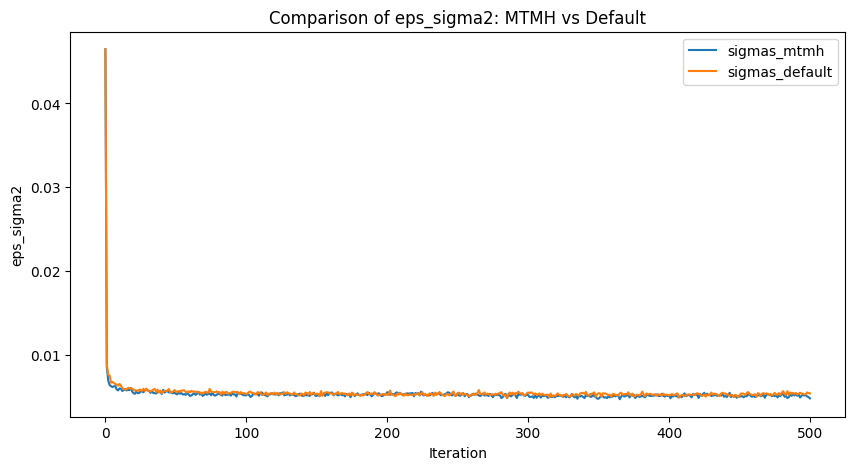

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(sigmas_mtmh, label='sigmas_mtmh')
plt.plot(sigmas_default, label='sigmas_default')
plt.xlabel('Iteration')
plt.ylabel('eps_sigma2')
plt.legend()
plt.title('Comparison of eps_sigma2: MTMH vs Default')
plt.show()

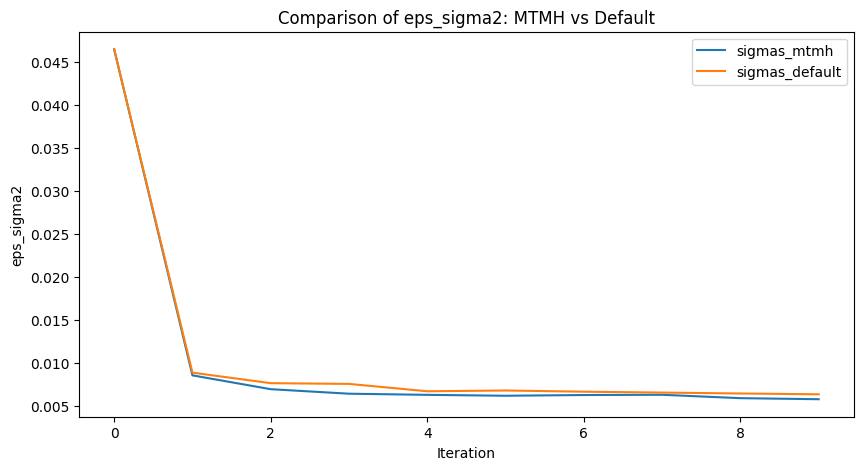

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(sigmas_mtmh[:10], label='sigmas_mtmh')
plt.plot(sigmas_default[:10], label='sigmas_default')
plt.xlabel('Iteration')
plt.ylabel('eps_sigma2')
plt.legend()
plt.title('Comparison of eps_sigma2: MTMH vs Default')
plt.show()

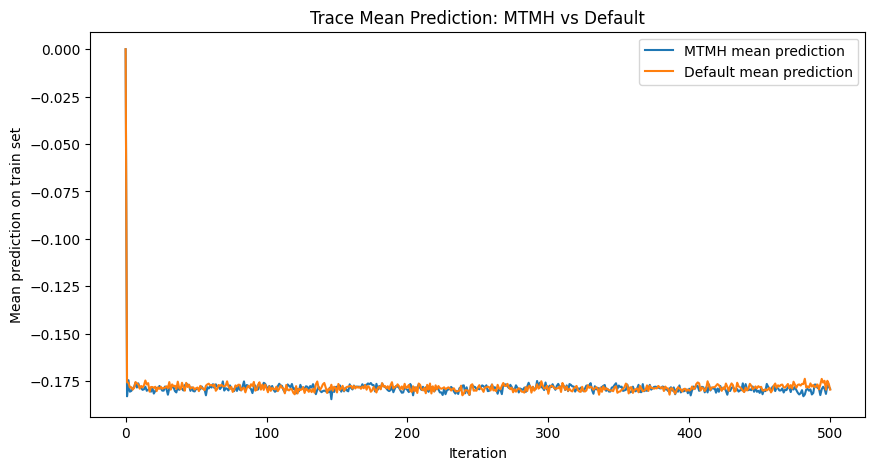

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(means_mtmh, label='MTMH mean prediction')
plt.plot(means_default, label='Default mean prediction')
plt.xlabel('Iteration')
plt.ylabel('Mean prediction on train set')
plt.legend()
plt.title('Trace Mean Prediction: MTMH vs Default')
plt.show()

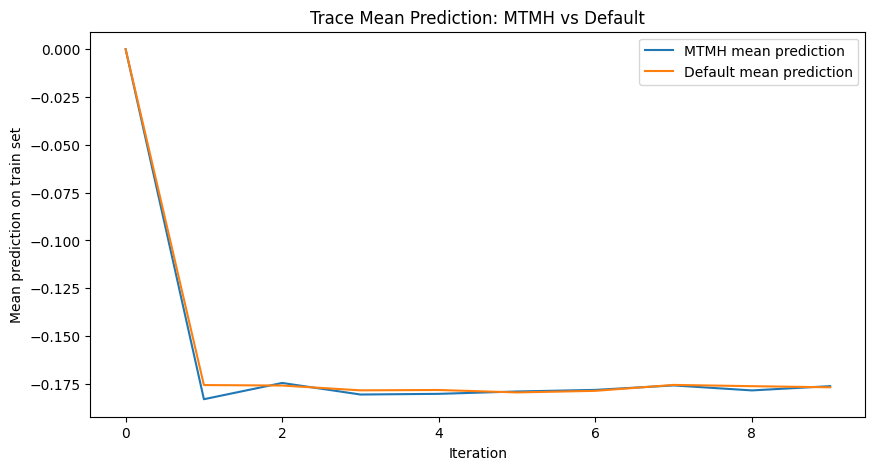

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(means_mtmh[:10], label='MTMH mean prediction')
plt.plot(means_default[:10], label='Default mean prediction')
plt.xlabel('Iteration')
plt.ylabel('Mean prediction on train set')
plt.legend()
plt.title('Trace Mean Prediction: MTMH vs Default')
plt.show()

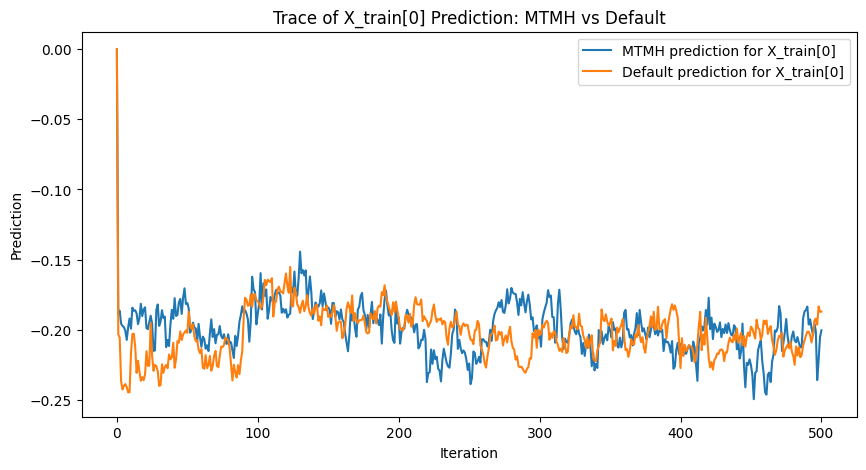

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(first_preds_mtmh, label='MTMH prediction for X_train[0]', color='tab:blue')
plt.plot(first_preds_default, label='Default prediction for X_train[0]', color='tab:orange')
plt.xlabel('Iteration')
plt.ylabel('Prediction')
plt.legend()
plt.title('Trace of X_train[0] Prediction: MTMH vs Default')
plt.show()